In [4]:
!pip install sounddevice
import sounddevice as sd

In [5]:
from scipy.io.wavfile import write

In [6]:
import matplotlib.pyplot as plt

In [7]:
import os

In [8]:
duration = 1
sample_freq = 22050

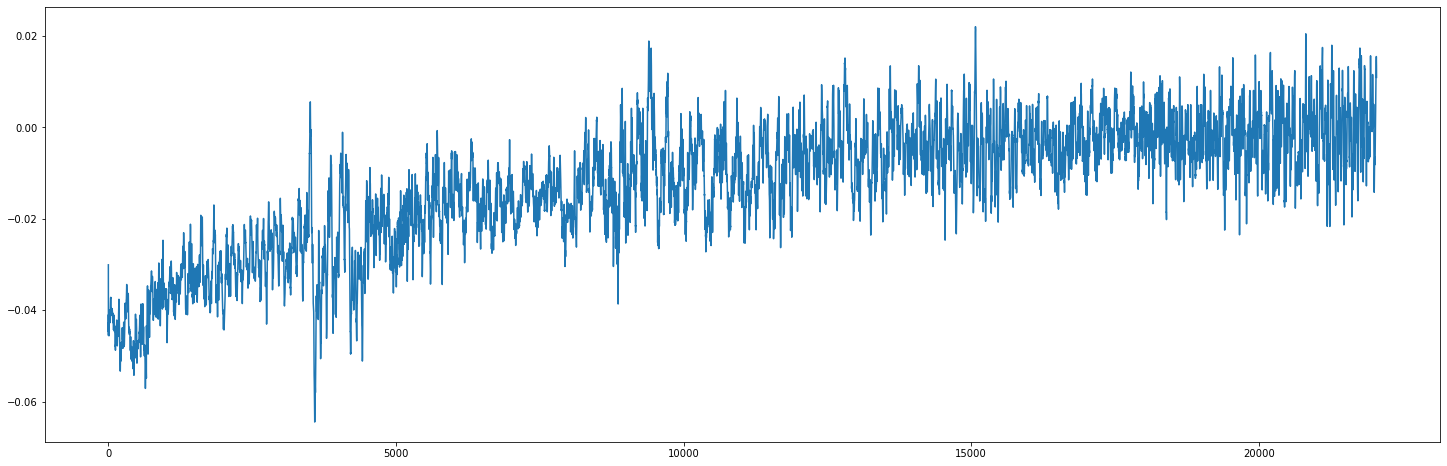

In [9]:
recording = sd.rec(int(duration*sample_freq),sample_freq,channels=1)
sd.wait()
plt.figure(figsize=(25,8))
plt.plot(recording)

In [10]:
recording

array([[-0.03009033],
       [-0.04553223],
       [-0.04098511],
       ...,
       [ 0.01464844],
       [ 0.01333618],
       [ 0.01092529]], dtype=float32)

In [11]:
recording.shape

(22050, 1)

In [15]:
write('hi.wav',sample_freq,recording)

In [13]:
import IPython.display as ipd

In [14]:
ipd.Audio('hi.wav')

In [19]:
!pip install librosa

In [20]:
import librosa as alib

In [21]:
sig, rate = alib.load('hi.wav')

In [22]:
rate

22050

In [23]:
sig

array([-0.03009033, -0.04553223, -0.04098511, ...,  0.01464844,
        0.01333618,  0.01092529], dtype=float32)

In [24]:
sig.shape

(22050,)

In [25]:
alib.feature.rms(sig)

array([[0.04281059, 0.0414016 , 0.03857818, 0.03470314, 0.03130584,
        0.02932132, 0.02888684, 0.02890854, 0.0280352 , 0.0266929 ,
        0.02289964, 0.0194458 , 0.0178893 , 0.01645412, 0.01689427,
        0.01597932, 0.01506853, 0.0143676 , 0.01296769, 0.012811  ,
        0.01254712, 0.01258118, 0.01184662, 0.01095614, 0.00986646,
        0.00888761, 0.00835099, 0.00852882, 0.00829681, 0.00821392,
        0.0080135 , 0.00748128, 0.00647798, 0.00580031, 0.0057463 ,
        0.00543284, 0.00565507, 0.00621009, 0.00685012, 0.0071006 ,
        0.00773694, 0.00787557, 0.00785593, 0.00824109]], dtype=float32)

In [26]:
22050/512

43.06640625

In [27]:
feats = alib.feature.mfcc(sig,n_mfcc=10)
feats

array([[-4.09295990e+02, -3.98822906e+02, -4.10330261e+02,
        -4.24351685e+02, -4.32808716e+02, -4.37351288e+02,
        -4.29233490e+02, -4.14026215e+02, -3.99697540e+02,
        -3.90919556e+02, -3.89889709e+02, -3.91823639e+02,
        -4.02595917e+02, -4.15610168e+02, -4.20923004e+02,
        -4.18295959e+02, -3.95801422e+02, -3.58027008e+02,
        -3.52056671e+02, -3.70559998e+02, -3.81792511e+02,
        -3.90412872e+02, -3.93084045e+02, -3.91658875e+02,
        -3.98142883e+02, -4.02095367e+02, -4.02438873e+02,
        -4.03852814e+02, -3.97254333e+02, -3.90820038e+02,
        -3.92868286e+02, -3.99043304e+02, -3.92019592e+02,
        -3.81932251e+02, -3.83389801e+02, -3.75995789e+02,
        -3.73799896e+02, -3.79141113e+02, -3.81615570e+02,
        -3.86040344e+02, -3.90082642e+02, -3.85061157e+02,
        -3.80742310e+02, -3.86802429e+02],
       [ 1.16518982e+02,  1.31757324e+02,  1.42610947e+02,
         1.45844467e+02,  1.46682358e+02,  1.54462982e+02,
         1.65

In [28]:
feats.shape

(10, 44)

In [29]:
feats.mean(axis=1).shape

(10,)

In [30]:
import pandas as pd

In [31]:
def extract_features(sig=None,rate=None, path=None):
    if path:
        sig,rate = alib.load(path)
    mfcc = alib.feature.mfcc(sig,rate,n_mfcc=30)
    stft = alib.feature.chroma_stft(sig,rate,n_chroma=12)
    zcr = alib.feature.zero_crossing_rate(sig,rate)
    mfcc_mean = mfcc.mean(axis=1).tolist()
    mfcc_var = mfcc.var(axis=1).tolist()
    stft_mean = [stft.mean()]
    stft_var = [stft.var()]
    zcr_mean = [zcr.mean()]
    zcr_var = [zcr.var()]   
    return mfcc_mean + mfcc_var + stft_mean + stft_var + zcr_mean + zcr_var

In [32]:
features = extract_features(path = 'hi.wav')

In [33]:
df = pd.DataFrame({i:[] for i in range(65)})

In [34]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64


In [35]:
len(features)

64

In [ ]:
ipd.Audio('GTZAN/Data/genres_original/disco/disco.00000.wav')

In [ ]:
sample_name = '_'.join(input('enter the sample name:').split())
try:
    os.mkdir('training/{}'.format(sample_name))
except:
    pass
for i in range(6):
    print('Say:',end='')
    recording = sd.rec(int(duration*sample_freq),sample_freq,channels=1)
    sd.wait()    
    write('training/{0}/{0}{1}.wav'.format(sample_name,i),sample_freq,recording)    
    print('... done')

In [37]:
def extract_features(sig=None,rate=None, path=None):
    if path:
        sig,rate = alib.load(path)
    mfcc = alib.feature.mfcc(sig,rate,n_mfcc=30)
    stft = alib.feature.chroma_stft(sig,rate,n_chroma=12)
    zcr = alib.feature.zero_crossing_rate(sig,rate)
    mfcc_mean = mfcc.mean(axis=1).tolist()
    mfcc_var = mfcc.var(axis=1).tolist()
    stft_mean = [stft.mean()]
    stft_var = [stft.var()]
    zcr_mean = [zcr.mean()]
    zcr_var = [zcr.var()]   
    return mfcc_mean + mfcc_var + stft_mean + stft_var + zcr_mean + zcr_var

In [ ]:
feats = []
for folder in os.listdir('training'):
    if '.ipynb' not in folder:
        for file in os.listdir('training/'+folder):
            feats.append(extract_features(path='/'.join(['training',folder,file]))+[folder])

In [39]:
len(feats)

0

In [ ]:
len(feats[0])

In [41]:
df = pd.DataFrame(feats)
df.head()

""


In [ ]:
x = df.drop(64,axis=1)
y = df[64]

In [43]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_svc = SVC().fit(x,y)
model_svc.score(x,y)

In [ ]:
model_knn = KNeighborsClassifier().fit(x,y)
model_knn.score(x,y)

In [ ]:
model_legit = LogisticRegression().fit(x,y)
model_legit.score(x,y)

In [ ]:
model_rf = RandomForestClassifier().fit(x,y)
model_rf.score(x,y)